# Setup

## Imports

In [1]:
import QuantumToolbox as qt
using Logging
import CairoMakie as cm
using MiniLoggers
using Revise
using Dates

In [2]:
import SuperconductingCavities as SC

ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.


## Some Extra Stuff

In [3]:
# MiniLogger(minlevel = MiniLoggers.Info) |> global_logger
InfoLogger = MiniLogger(minlevel = MiniLoggers.Info)
ProgressLogger = MiniLogger(minlevel = LogLevel(-1))
DebugLogger = MiniLogger(minlevel = MiniLoggers.Debug)

global_logger(ProgressLogger)

Base.CoreLogging.SimpleLogger(VSCodeServer.IJuliaCore.IJuliaStdio{Base.PipeEndpoint, typeof(VSCodeServer.io_send_callback)}(IOContext(Base.PipeEndpoint(RawFD(21) open, 0 bytes waiting)), VSCodeServer.io_send_callback), Info, Dict{Any, Int64}())

In [4]:
function tostr(obj)
    io = IOBuffer()
    show(io, "text/plain", obj)
    String(take!(io))
end

tostr (generic function with 1 method)

# Example

## Initializing Models

### Creating Model From Scratch

#### One Mode

In [5]:
Eᶜ = 0.10283303447280807;
Eʲ = 26.96976142643705;
Eᵒˢᶜ = 6.2280871213;
g = 0.026184375000000013;
name = "transmon";
ng  =  0;
N=10;
N_cut = 60;

OneMode = SC.Transmon_Resonators_Constructor(Eᶜ, Eʲ, [Eᵒˢᶜ], [g], N, [N], Cavity_Names = ["Mode 3"]);

#### Two Mode

In [6]:
Eᶜ = 0.10283303447280807;
Eʲ = 26.96976142643705;
Eᵒˢᶜs = [6.2280871213, 6.72062927579];
gs = [0.026184375000000013, 0.03020625000000001];
name = "transmon";
ng  =  0;
Nₜ =10;
Nᵣs = [6, 6]
N_cut = 60;


TwoModes = SC.Transmon_Resonators_Constructor(Eᶜ, Eʲ, Eᵒˢᶜs, gs, Nₜ, Nᵣs, Cavity_Names = ["Mode 3", "Mode 5"]);

### Importing Model

In [29]:
Mode3 = SC.Transmon_Resonators_Loader("ModelSaves/Mode3/Mode3.json");

hi

In [30]:
Mode3.Stuff["op_drive_params"]["sb_f_0_4pi_f_3"]["Envelope Args"]

JSON3.Object{Vector{UInt8}, SubArray{UInt64, 1, Vector{UInt64}, Tuple{UnitRange{Int64}}, true}} with 3 entries:
  :ramp_time    => 10
  :sigma_factor => 2
  :pulse_time   => 1601.37

In [31]:
Mode3.Stuff["Drive_Sequences"]

JSON3.Object{Vector{UInt8}, SubArray{UInt64, 1, Vector{UInt64}, Tuple{UnitRange{Int64}}, true}} with 1 entry:
  :Binomial_Encoding => ["q_e_0", "q_g_0", "sb_f_0_Main", "q_g_0", "q_e_1", "q_…

## Time Evolving Wavefunctions

### Running A Single Pulse

In [10]:
ψ = Mode3.dressed_states[(0,0)]
res = SC.RunSingleOperator(Mode3, ψ, Mode3.Stuff["op_drive_params"]["q_g_0"], save_step = false, to_return = "All", step_name = "q_g_0", run_name = "Single_Op_Demo_"*string(now()));

[2024-09-19 21:09:34] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-09-19 21:09:36] Info: Time Evolution Complete
[2024-09-19 21:09:36] Info: Done with q_g_0


You can directly plot the evolution using as in the cell below. however, it computes the overlaps every time. If you want to precompute those, view the cells after! 

[2024-09-19 21:09:43] Info: Making Plot


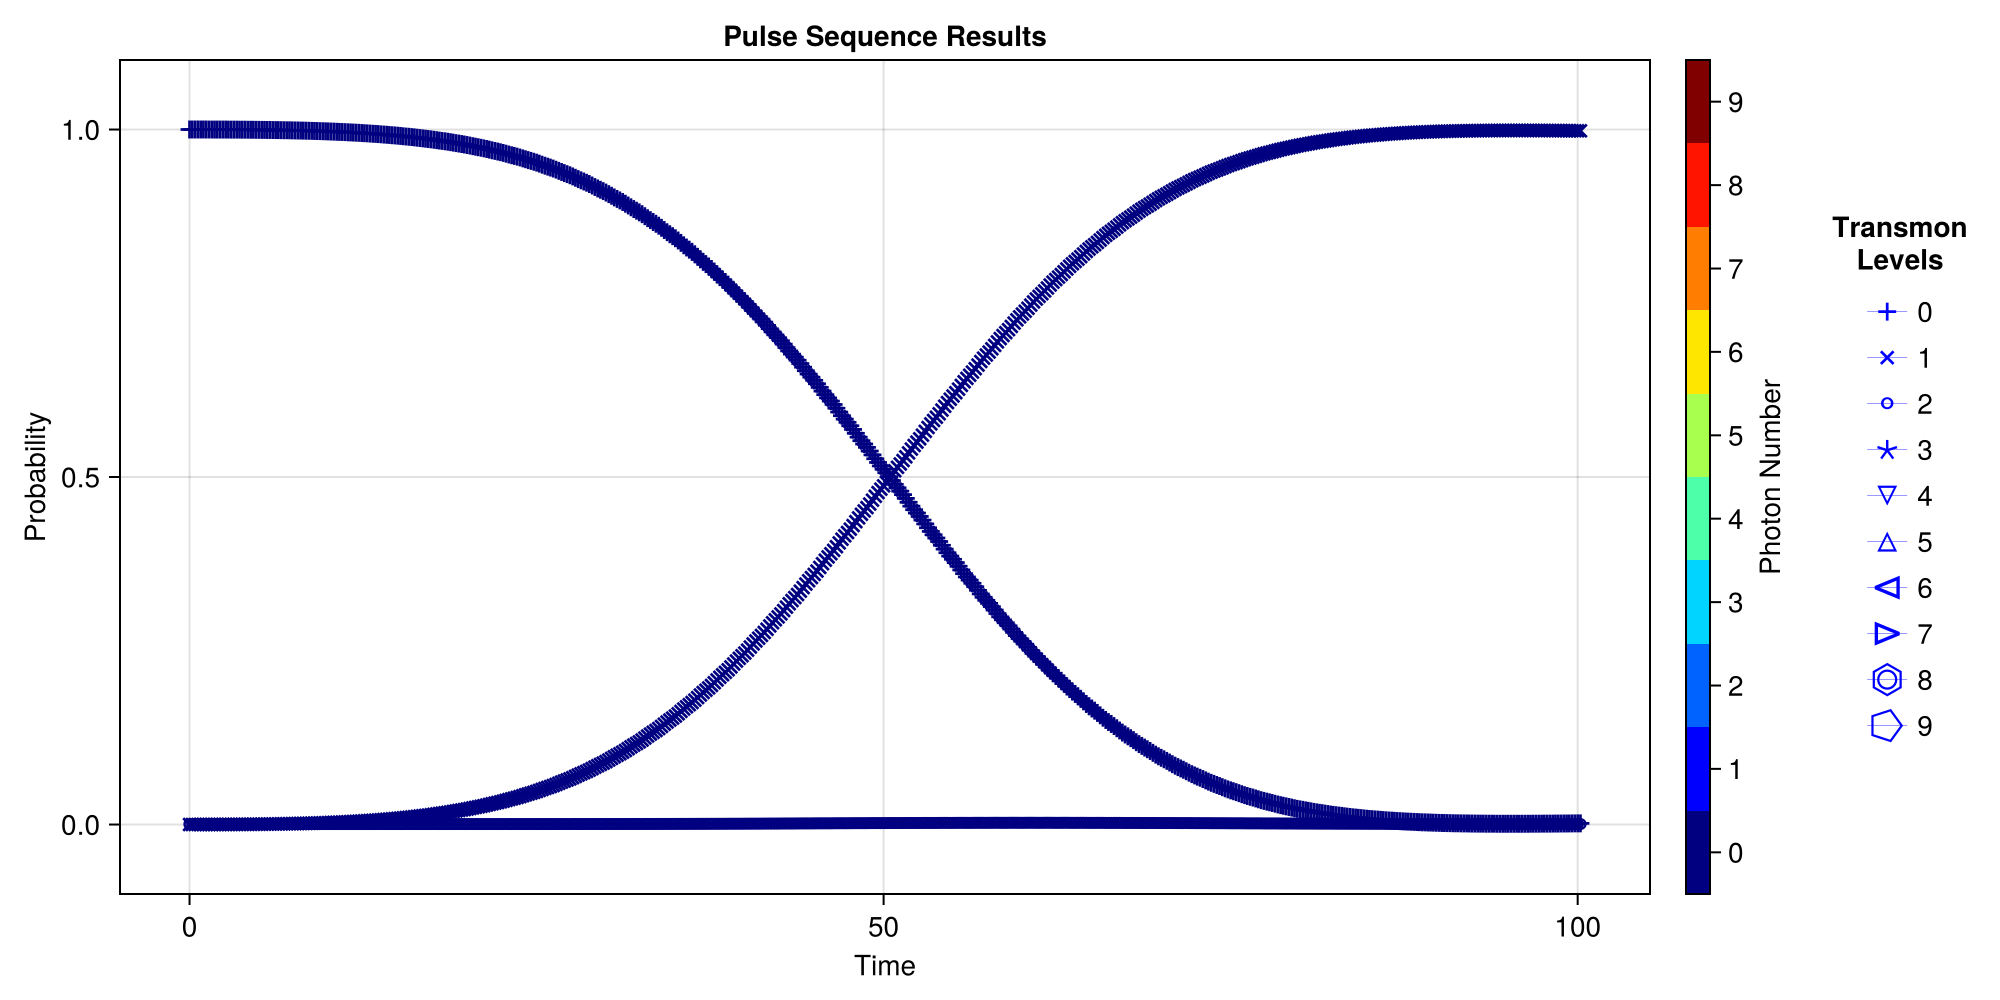

In [11]:
SC.PlotSingleModeEvolution(Mode3, res.times, res.states)

In [12]:
# Takes in a dictionary of wave functions and gets a dictionary of projection operators
proj_dict = SC.Get_Projection_Ops(Mode3.dressed_states)

# Gets a dictionary of expectation values for a list of states. In this case the list of states
# is the state history and the op dict is the dict of projection ops
EV_Dict = SC.Get_EVs(res.states, proj_dict);



[2024-09-19 21:10:01] Info: Making Plot


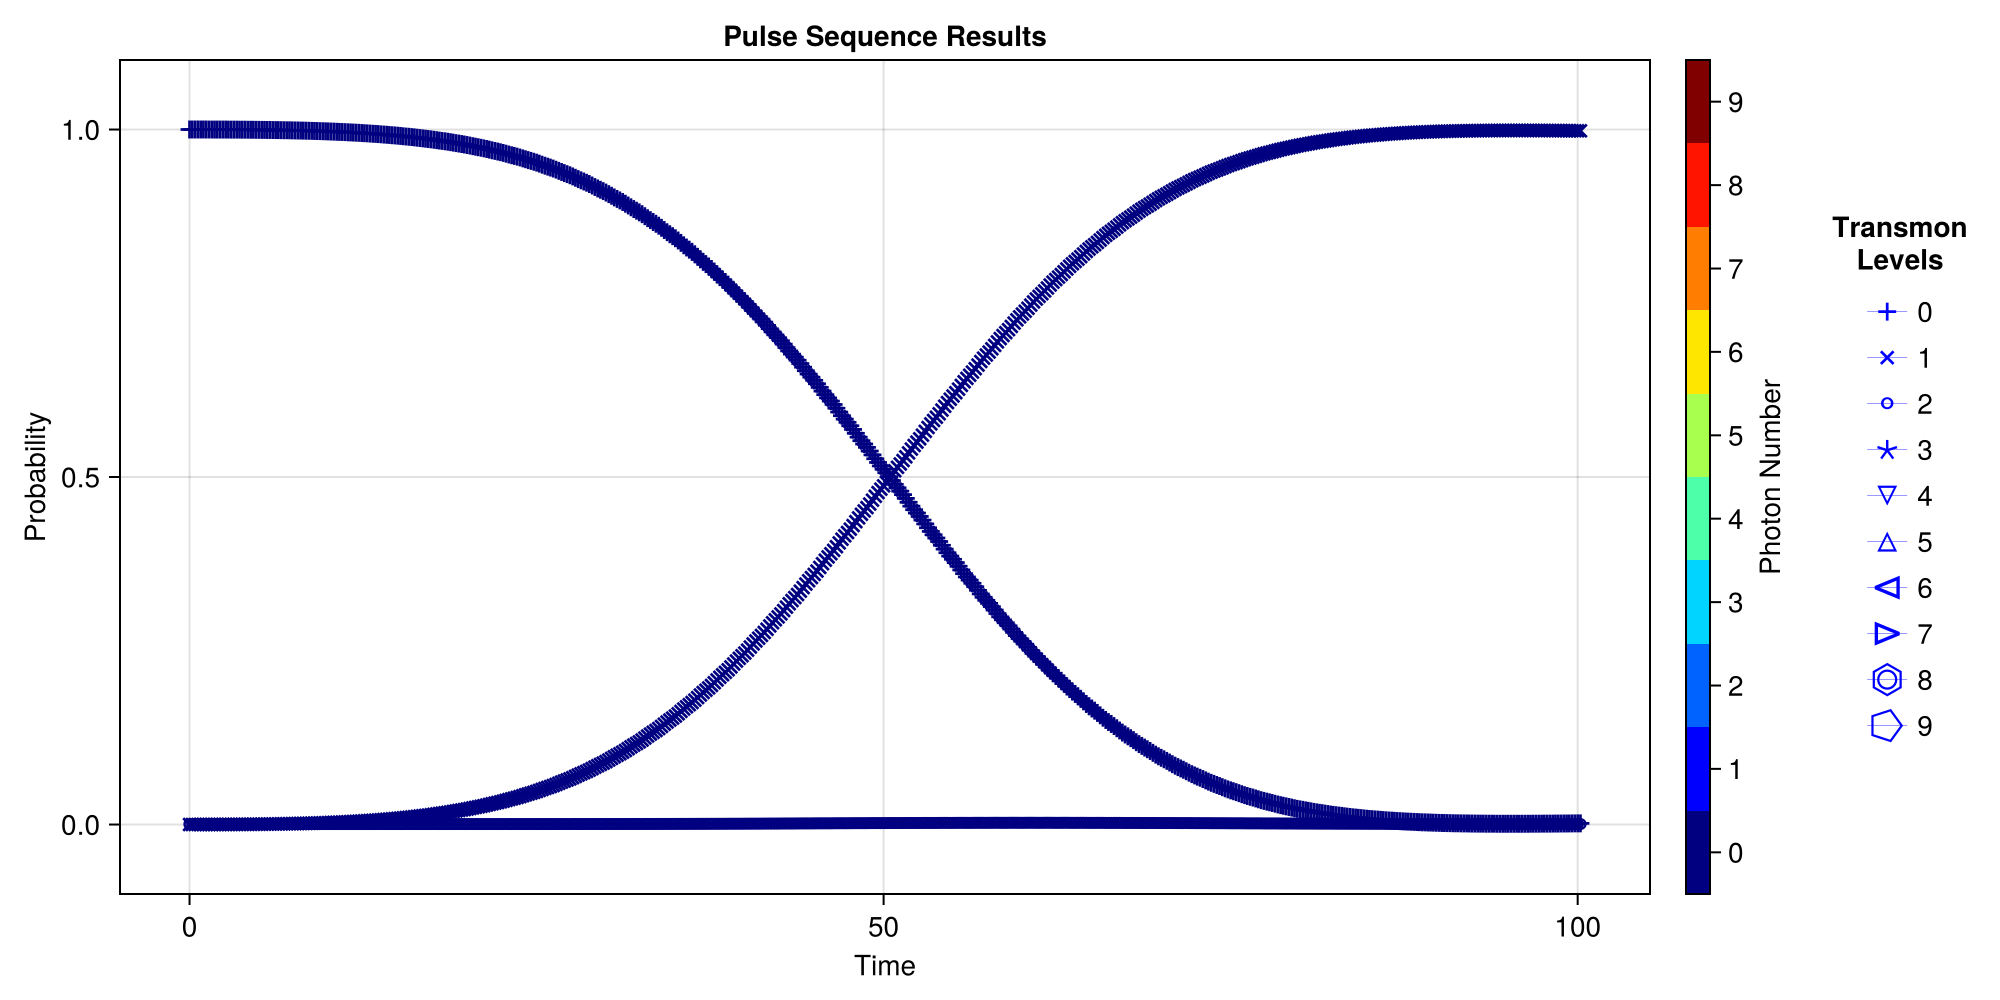

In [13]:
# Now to plot. Instead of passing in the list of states, we pass in the dictionary of all the expectation values

SC.PlotSingleModeEvolution(Mode3, res.times, EV_Dict)

### Running a Series of Operators

By default, RunPulesSequence does not return anything and stores data in a .nc file. You can have it return stuff by setting "Return = true" however that keeps the saved file. You can have it automatically delete the file by setting clean_up = true. Note, these two options are only there in the wavefunction version of the RunPulseSequence. If you pass in a density matrix then that function only writes and does not save. This is because instead of taking seconds, that function usually takes minutes to hours. 

#### Getting Data

In [44]:
ψ = Mode3.dressed_states[(0,0)]
#res = SC.RunPulseSequence(Mode3, ψ, ["q_g_0", "q_e_0"], Return = true, clean_up = true);
res = SC.RunPulseSequence(Mode3, ψ, Mode3.Stuff["Drive_Sequences"]["Binomial_Encoding"], Return = true, clean_up = true);

The Name for this run is: Operator_Sequence_2024-09-19T21:19:41.186
It is being saved at: Data/
[2024-09-19 21:19:41] Info: Running operator q_e_0
[2024-09-19 21:19:41] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)
[2024-09-19 21:19:42] Info: Time Evolution Complete
[2024-09-19 21:19:42] Info: Saving Steps
[2024-09-19 21:19:42] Info: Done with Step_1
[2024-09-19 21:19:42] Info: Running operator q_g_0
[2024-09-19 21:19:42] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 01s (ETA: 0h 00m 00s)
[2024-09-19 21:19:44] Info: Time Evolution Complete
[2024-09-19 21:19:44] Info: Saving Steps
[2024-09-19 21:19:44] Info: Done with Step_2
[2024-09-19 21:19:44] Info: Running operator sb_f_0_Main
[2024-09-19 21:19:44] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 02s (ETA: 0h 00m 00s)
[2024-09-19 21:19:46] Inf

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


#### Making Plot

In [45]:
# Takes in a dictionary of wave functions and gets a dictionary of projection operators
proj_dict = SC.Get_Projection_Ops(Mode3.dressed_states);

# Gets a dictionary of expectation values for a list of states. In this case the list of states
# is the state history and the op dict is the dict of projection ops
EV_Dict = SC.Get_EVs(res["states"], proj_dict);


[2024-09-19 21:21:24] Info: Making Plot


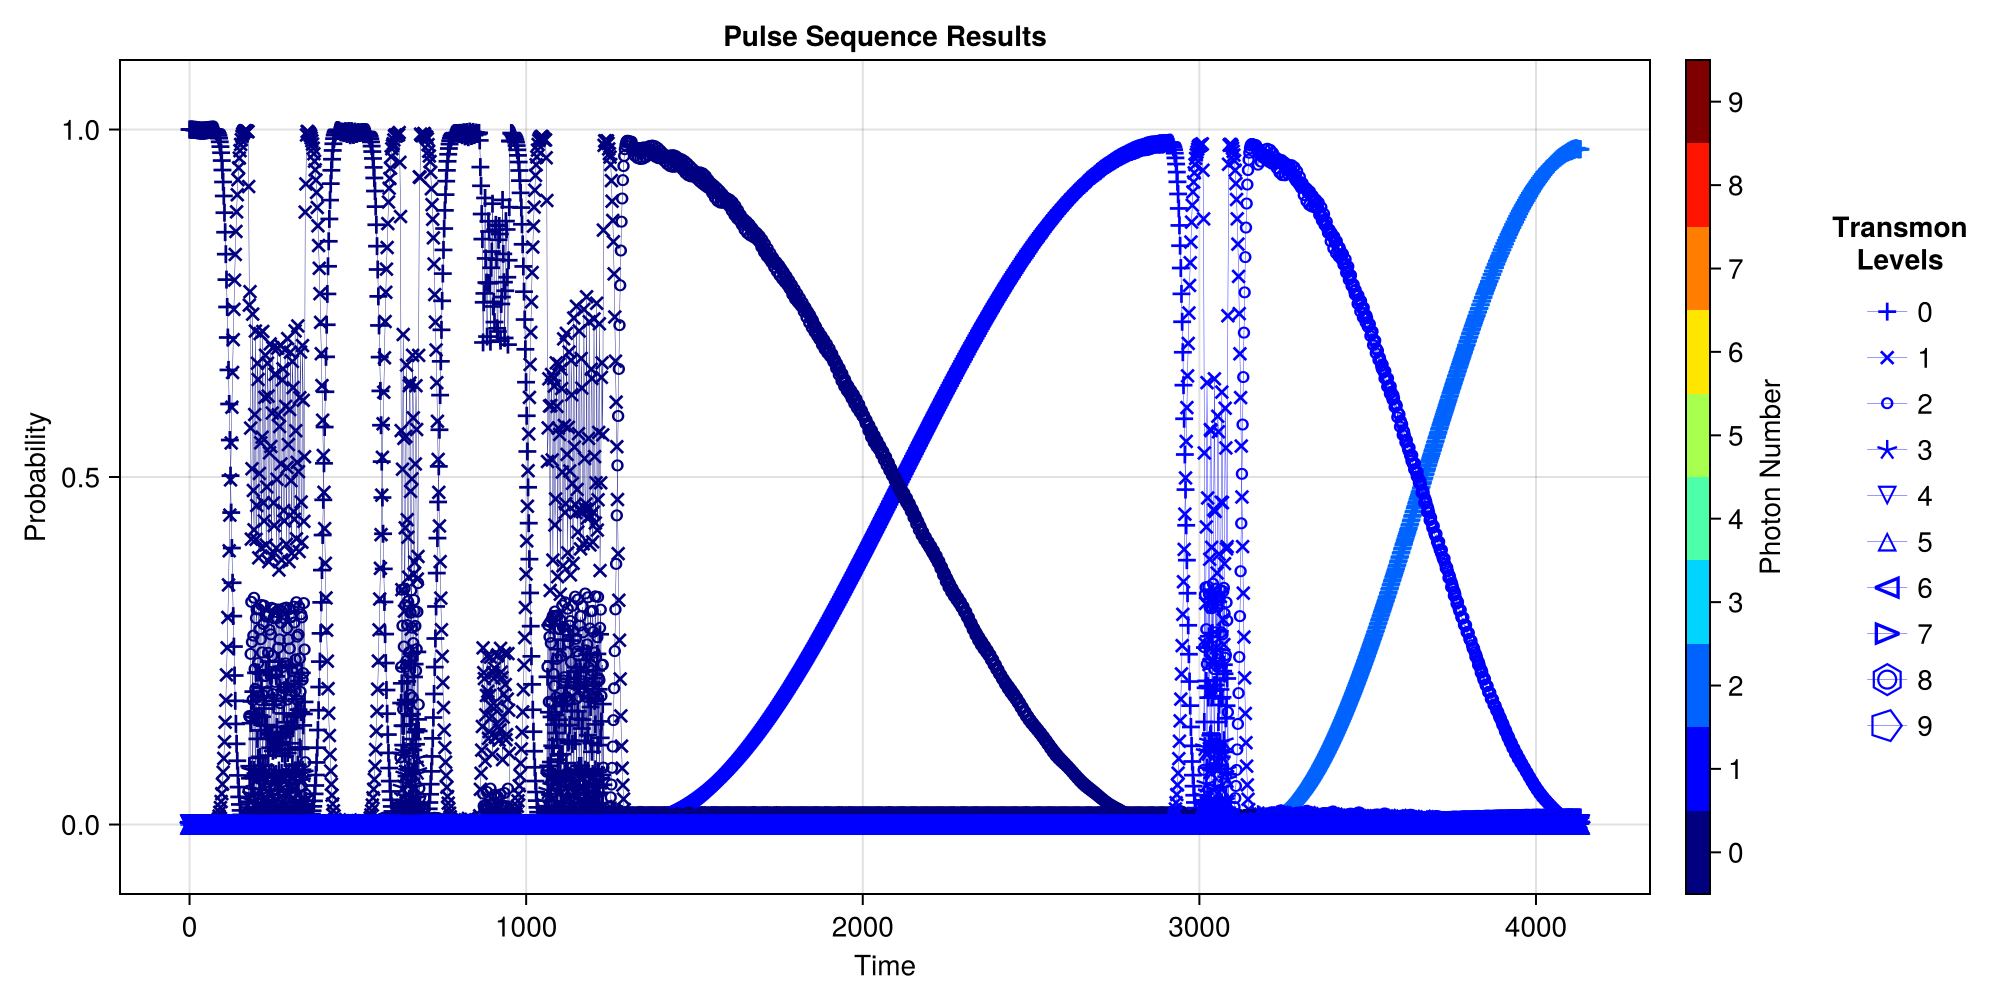

In [46]:
SC.PlotSingleModeEvolution(Mode3, res["times"], EV_Dict, plot_every = 10)

## With Density Matrices

These runs take a long time. 

In [52]:
Mode3.CandD_Ops

Dict{Any, Any} with 3 entries:
  "Mode 3 Collapse"    => Quantum Object:   type=Operator   dims=[10, 10]   siz…
  "Transmon Collapse"  => Quantum Object:   type=Operator   dims=[10, 10]   siz…
  "Transmon Dephasing" => Quantum Object:   type=Operator   dims=[10, 10]   siz…

In [ ]:
ψ = Mode3.dressed_states[(0,0)]
ρ = ψ*ψ'
SC.RunPulseSequence(Mode3, ρ, ["q_g_0"], c_ops = [], run_name = "Demo_Run_With_Out_Loss_"*string(now()))

In [ ]:
SC.RunPulseSequence(Mode3, ρ, Mode3.Stuff["Drive Sequences"]["Binomial_Code"], c_ops = collect(values(Mode3.CandD_Ops)), run_name = "Demo_Run_With_Loss_"*string(now()))

## Searching For Pulses and Floquet Analysis

Lets look for a $|f0\rangle\to |g1\rangle$ sideband with $\epsilon = 0.8$ 

#### Getting Stark Shift

[2024-09-19 21:47:32] Info: Beginning Floquet Sweep
[2024-09-19 21:47:41] Info: Done With Floquet Sweep
[2024-09-19 21:47:41] Info: Tracking State (0, 1)
[2024-09-19 21:47:41] Info: Tracking State (2, 0)
[2024-09-19 21:47:41] Info: Fit Stuff: 3-element Vector{Float64}:	 0.044266623061823045	 0.0025599974098680692	 2.1458917547434946


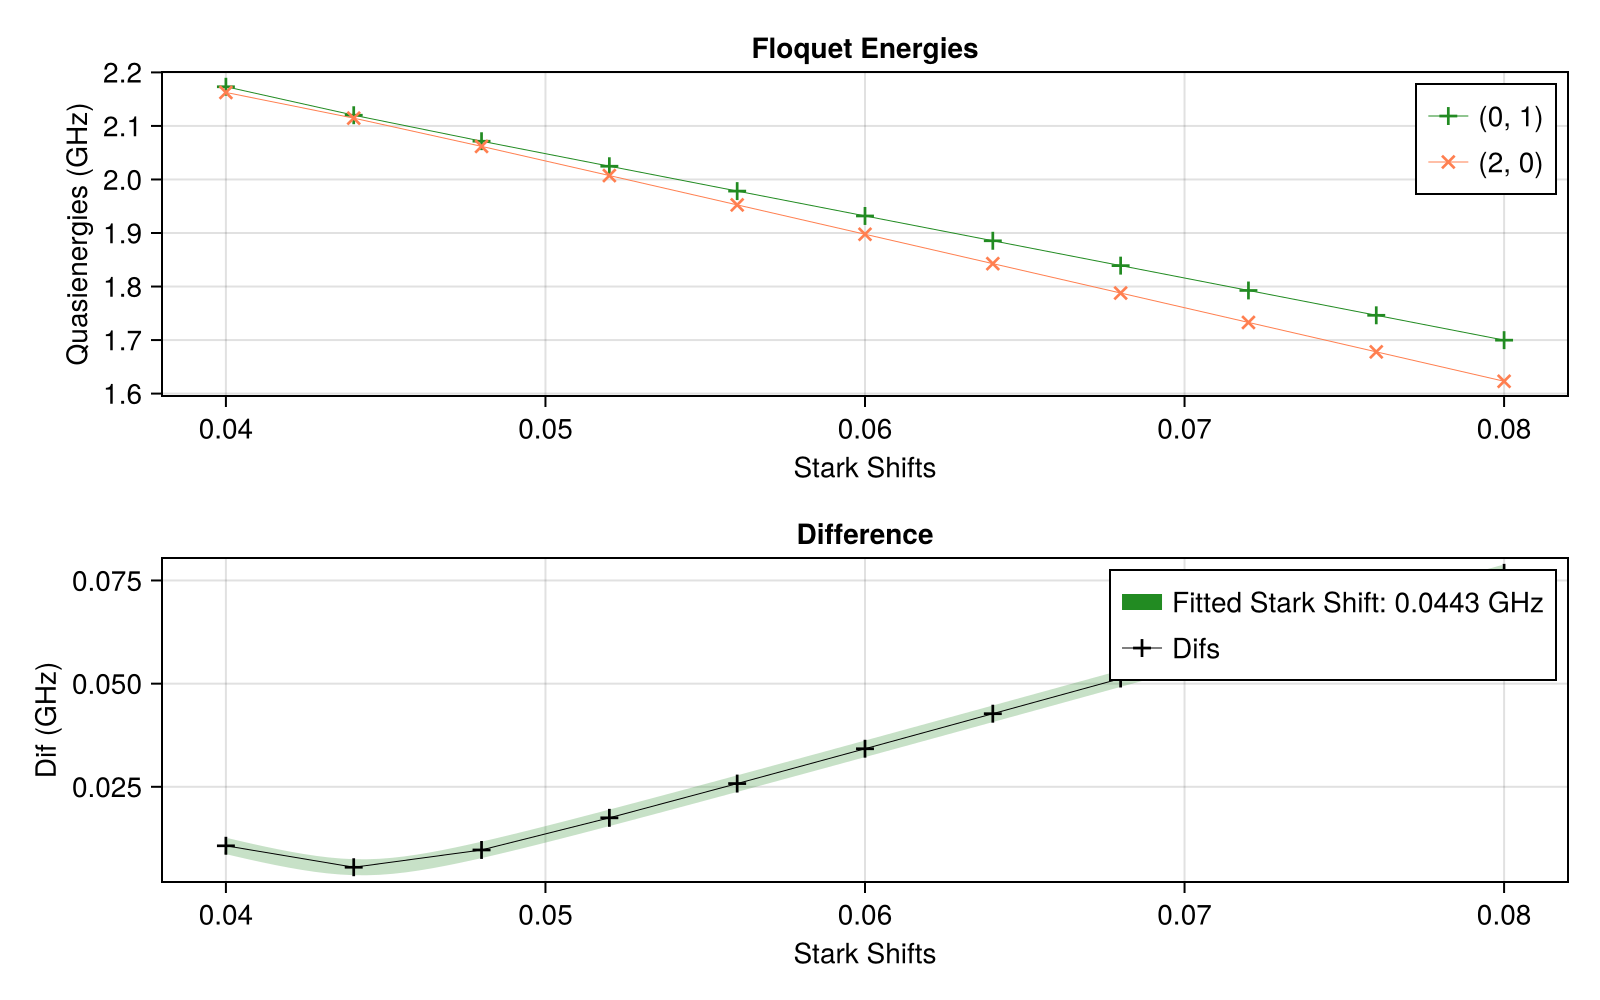

2-element Vector{Float64}:
   0.044266623061823045
 182.0340631626409

In [63]:
ε = 0.8

drive_op = Mode3.n̂ₜ

state1 = (2,0)
state2 = (0,1)

stark_shift_list = collect(LinRange(0.04, 0.08, 11));

stark_shift_res = SC.FindStarkShift(Mode3, Mode3.n̂ₜ, state1, state2, ε, stark_shift_list)

#### Getting Pulse Time!

In [64]:
ψ1 = Mode3.dressed_states[state1]
ψ2 = Mode3.dressed_states[state2]

freq_d = Mode3.dressed_energies[state2]-Mode3.dressed_energies[state1]
envelope = "Sine_Squared_Ramp"
envelope_args = Dict{Any, Any}("ramp_time" => 10, "pulse_time" => 0)

t_range = [stark_shift_res[2], stark_shift_res[2]+20] # 20 is 2x ramp time

optimize_res = SC.OptimizePulse(Mode3, ψ1, ψ2, ε, freq_d, stark_shift_res[1], t_range, envelope, envelope_args)

[2024-09-19 21:47:41] Info: On Level 1
[2024-09-19 21:47:41] Info: On Step 1: t = 182.0340631626409
[2024-09-19 21:47:41] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 03s (ETA: 0h 00m 00s)
[2024-09-19 21:47:44] Info: Time Evolution Complete
[2024-09-19 21:47:44] Info: Done with Level_1_step_1
[2024-09-19 21:47:44] Info: On Step 2: t = 187.0340631626409
[2024-09-19 21:47:44] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 03s (ETA: 0h 00m 00s)
[2024-09-19 21:47:48] Info: Time Evolution Complete
[2024-09-19 21:47:48] Info: Done with Level_1_step_2
[2024-09-19 21:47:48] Info: On Step 3: t = 192.0340631626409
[2024-09-19 21:47:48] Info: Running Time Evolution
Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 04s (ETA: 0h 00m 00s)
[2024-09-19 21:47:53] Info: Time Evolution Complete
[2024-09-19 21:47:53] Info: Done with Level_1_step_3
[2024-09-19 21:47:5

Dict{Any, Any} with 6 entries:
  "pulse_time"    => 193.284
  "Envelope Args" => Dict{Any, Any}("pulse_time"=>193.284, "ramp_time"=>10)
  "epsilon"       => 0.8
  "Envelope"      => "Sine_Squared_Ramp"
  "shift"         => 0.0442666
  "freq_d"        => -2.87015